Data Analysis

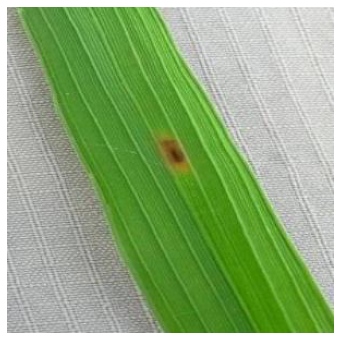

In [ ]:

import imageio
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

pic=imageio.imread('/content/drive/MyDrive/KNN/test/2brownspot.png')

plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off');

Prediction using CNN Models

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data Analysis

In [ ]:
training_folder = '/content/drive/MyDrive/Paddy Detection/Rice_Leaf_Disease_dataset/train/'
validation_folder = '/content/drive/MyDrive/Paddy Detection/Rice_Leaf_Disease_dataset/validation/'

In [ ]:
BacterialBlight = [training_folder + '/BacterialBlight/' + img for img in os.listdir(training_folder + '/BacterialBlight')[:9]]
BrownSpot = [training_folder + '/BrownSpot/' + img for img in os.listdir(training_folder + '/BrownSpot')[:9]]
NarrowBlast = [training_folder + '/NarrowBlast/' + img for img in os.listdir(training_folder + '/NarrowBlast')[:9]]
Tungro = [training_folder + '/Tungro/' + img for img in os.listdir(training_folder + '/Tungro')[:9]]

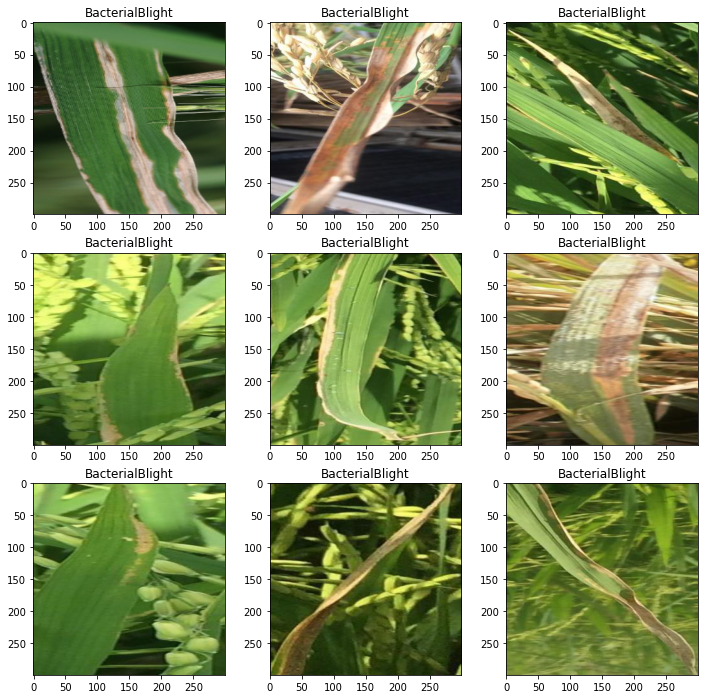

In [ ]:
plt.figure(figsize=(12,12))
for i,k  in enumerate(BacterialBlight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("BacterialBlight")

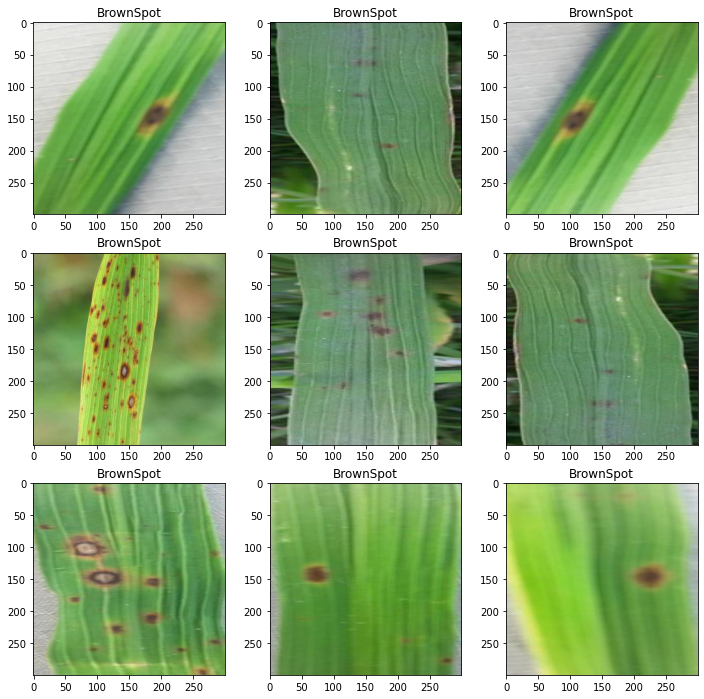

In [ ]:
plt.figure(figsize=(12,12))
for i,k  in enumerate(BrownSpot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("BrownSpot")

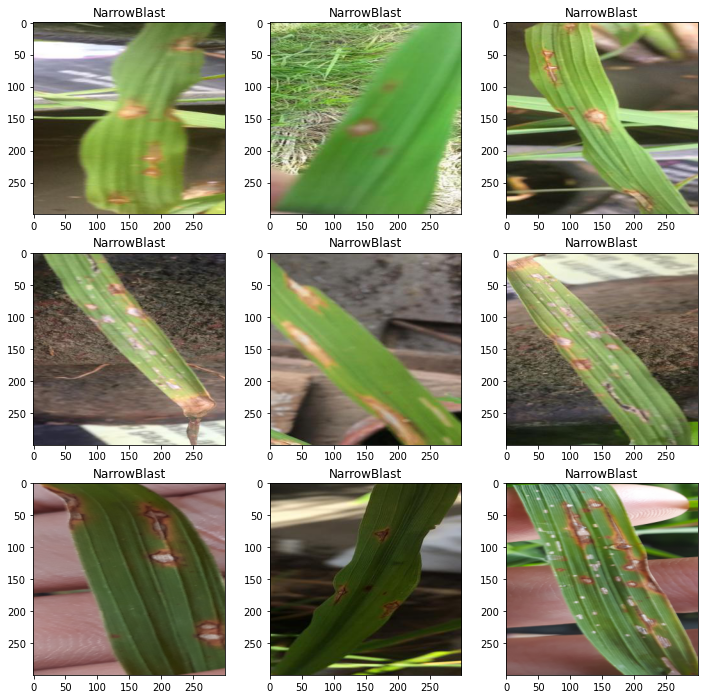

In [ ]:
plt.figure(figsize=(12,12))
for i,k  in enumerate(NarrowBlast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("NarrowBlast")

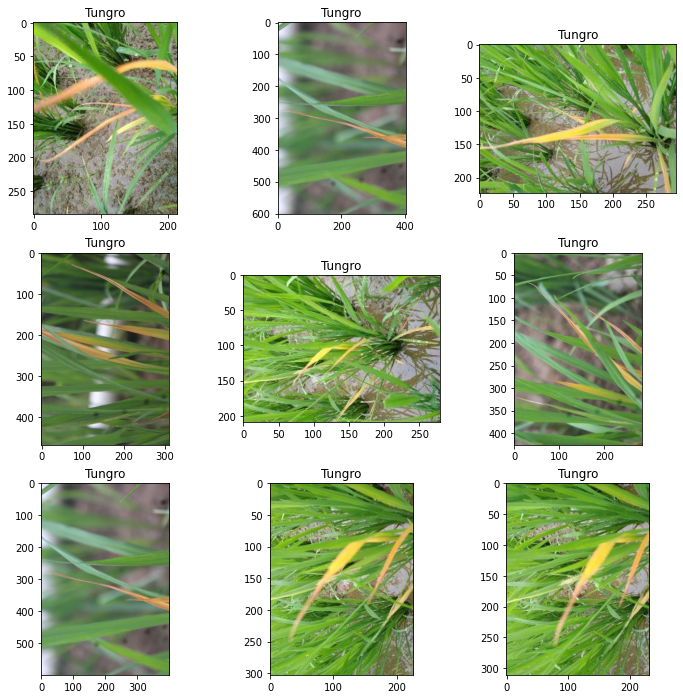

In [ ]:
plt.figure(figsize=(12,12))
for i,k  in enumerate(Tungro):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Tungro")

Modle Training

In [ ]:
batch_size = 16
image_size = 300
input_shape = (image_size, image_size, 3)
dropout_rate = 0.3

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode = 'nearest',
        channel_shift_range=0.5,
        brightness_range=[0.5,1.2],
        shear_range=0.5,
        rotation_range=25,
        zoom_range=[0.5, 1],
        )
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_datagenerator = train_datagen.flow_from_directory(
        training_folder,
        target_size=(image_size, image_size),
        shuffle=True,
        batch_size=batch_size,
        class_mode='categorical')
validation_datagenerator = validation_datagen.flow_from_directory(
        validation_folder,
        target_size=(image_size, image_size),
        shuffle=True,
        batch_size=batch_size,
        class_mode='categorical') 

Found 4400 images belonging to 4 classes.
Found 1100 images belonging to 4 classes.


In [ ]:
def create_model():
    efficientnet = tf.keras.applications.EfficientNetB3(weights="imagenet", 
                                   include_top=False, 
                                   input_shape=input_shape)


    input_layer = tf.keras.layers.Input(shape = input_shape)
    efficientnet = efficientnet(input_layer)
    flatten = tf.keras.layers.Flatten()(efficientnet)
    dropout = tf.keras.layers.Dropout(dropout_rate)(flatten)
    outputs = tf.keras.layers.Dense(4, activation="softmax")(dropout)
    model = tf.keras.models.Model(inputs=input_layer, outputs=outputs)
    model.summary()
    return model

model = create_model() # define your model normally

43950080/43941136 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
efficientnetb3 (Functional)  (None, 10, 10, 1536)      10783535  
_________________________________________________________________
flatten (Flatten)            (None, 153600)            0         
_________________________________________________________________
dropout (Dropout)            (None, 153600)            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 614404    
Total params: 11,397,939
Trainable params: 11,310,636
Non-trainable params: 87,303
_________________________________________________________________


In [ ]:
epochs = 10
decay_steps = int(np.ceil(train_datagenerator.n / float(batch_size)))*epochs
cosine_decay = tf.keras.experimental.CosineDecay(initial_learning_rate=1e-4, decay_steps=decay_steps, alpha=0.4)
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='best_rice_disease_model.h5', monitor='val_loss', save_best_only=True)]
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), optimizer=tf.keras.optimizers.Adam(cosine_decay), metrics=["accuracy"])

In [ ]:

history = model.fit(
    train_datagenerator,
    steps_per_epoch=int(np.ceil(train_datagenerator.n / float(batch_size))),
    epochs=epochs,
    validation_data=validation_datagenerator,
    validation_steps=int(np.ceil(validation_datagenerator.n / float(batch_size)))
)

Epoch 1/10
275/275 [==============================] - 1513s 5s/step - loss: 1.0386 - accuracy: 0.7936 - val_loss: 1.9496 - val_accuracy: 0.2545
Epoch 2/10
275/275 [==============================] - 309s 1s/step - loss: 0.7727 - accuracy: 0.9261 - val_loss: 1.1276 - val_accuracy: 0.5827
Epoch 3/10
275/275 [==============================] - 309s 1s/step - loss: 0.7101 - accuracy: 0.9625 - val_loss: 0.9532 - val_accuracy: 0.7691
Epoch 4/10
275/275 [==============================] - 309s 1s/step - loss: 0.6763 - accuracy: 0.9859 - val_loss: 5.0202 - val_accuracy: 0.7218
Epoch 5/10
275/275 [==============================] - 310s 1s/step - loss: 0.6632 - accuracy: 0.9902 - val_loss: 0.6561 - val_accuracy: 0.9873
Epoch 6/10
275/275 [==============================] - 311s 1s/step - loss: 0.6499 - accuracy: 0.9907 - val_loss: 0.6409 - val_accuracy: 0.9900
Epoch 7/10
275/275 [==============================] - 312s 1s/step - loss: 0.6377 - accuracy: 0.9959 - val_loss: 0.6867 - val_accuracy: 0.969

In [ ]:
model.save("/content/drive/MyDrive/Paddy Detection/models/model1.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Paddy Detection/models/model1.h5')

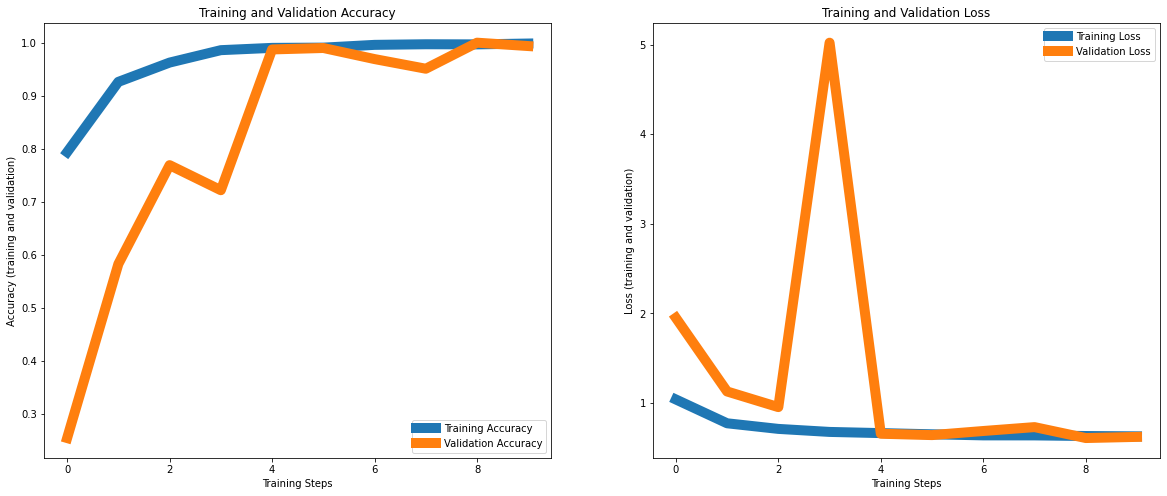

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc,linewidth=10, label='Training Accuracy')
plt.plot(epochs_range, val_acc,linewidth=10, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss,linewidth=10, label='Training Loss')
plt.plot(epochs_range, val_loss,linewidth=10, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

Predictions:
 [2 2 2 0 2 0 2 2 0 2 2 2 2 2 2 2]
Labels:
 [2 1 1 0 2 2 0 1 2 2 3 1 0 0 3 3]


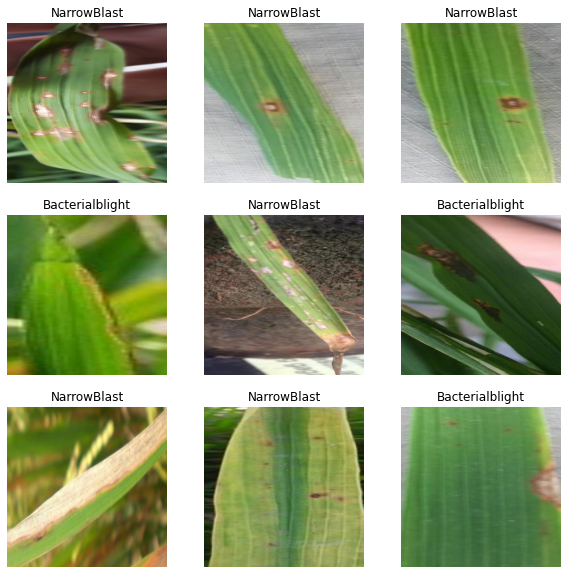

In [ ]:
class_names = ['Bacterialblight','Brownspot','NarrowBlast','Tungrot']

image_batch, label_batch = validation_datagenerator.next()
predictions = model.predict_on_batch(image_batch)

predicted_class = np.argmax(predictions, axis=-1)
label = np.argmax(label_batch, axis=-1)

print('Predictions:\n', predicted_class)
print('Labels:\n', label)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i])
  plt.title(class_names[predicted_class[i]])
  plt.axis("off")

In [ ]:
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob

class_names = ['Bacterialblight','Brownspot','NarrowBlast','Tungrot']
def load_image(filename):
    img = cv2.imread(os.path.join("/content/drive/MyDrive/Paddy Detection/Rice_Leaf_Disease_dataset/", "/content/drive/MyDrive/Paddy Detection/Rice_Leaf_Disease_dataset/validation/", filename))
    img = cv2.resize(img,(300, 300) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {class_names[class_idx]: probabilities[class_idx]}

SOURCE: class: Brownspot, file: Brownspot/BROWNSPOT1_049.jpg
PREDICTED: class: Bacterialblight, confidence: 1.000000


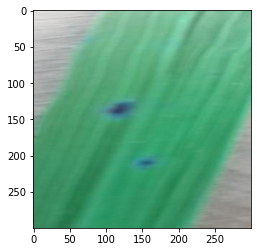

<Figure size 432x288 with 0 Axes>

In [ ]:

for idx, filename in enumerate(random.sample(validation_datagenerator.filenames, 1)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

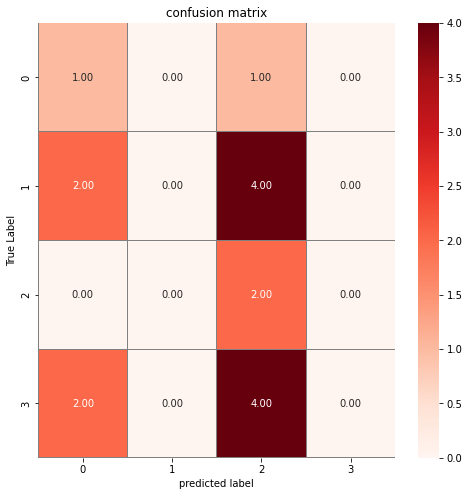

In [ ]:
from sklearn.metrics import confusion_matrix



image_batch, label_batch = validation_datagenerator.next()

predictions = model.predict_on_batch(image_batch)

predicted_class = np.argmax(predictions, axis=-1)
label = np.argmax(label_batch, axis=-1)



confusion_mtx = confusion_matrix(label,predicted_class)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:

predictions = model.predict(validation_datagenerator)

predicted_class = np.argmax(predictions, axis=-1)


In [ ]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(label, predicted_class)
print('Accuracy: %f' % accuracy)

ValueError: ignored

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(label, predicted_class,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(label, predicted_class,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(label, predicted_class,average='micro')
print('F1 score: %f' % f1)